## IMPORTING REQUIRED LIBRARIES

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [24]:
from tensorflow import keras

In [18]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [32]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from matplotlib import style

In [92]:
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## LOADING DATASET

In [38]:
data_dir = 'C:/Users/yaswa/Downloads/Traffic'
train_path = 'C:/Users/yaswa/Downloads/Traffic/Train'
test_path = 'C:/Users/yaswa/Downloads/Traffic/Test'


In [39]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES


43

## Labelling 43 different classes

In [40]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Performing Exploratory Data Analysis

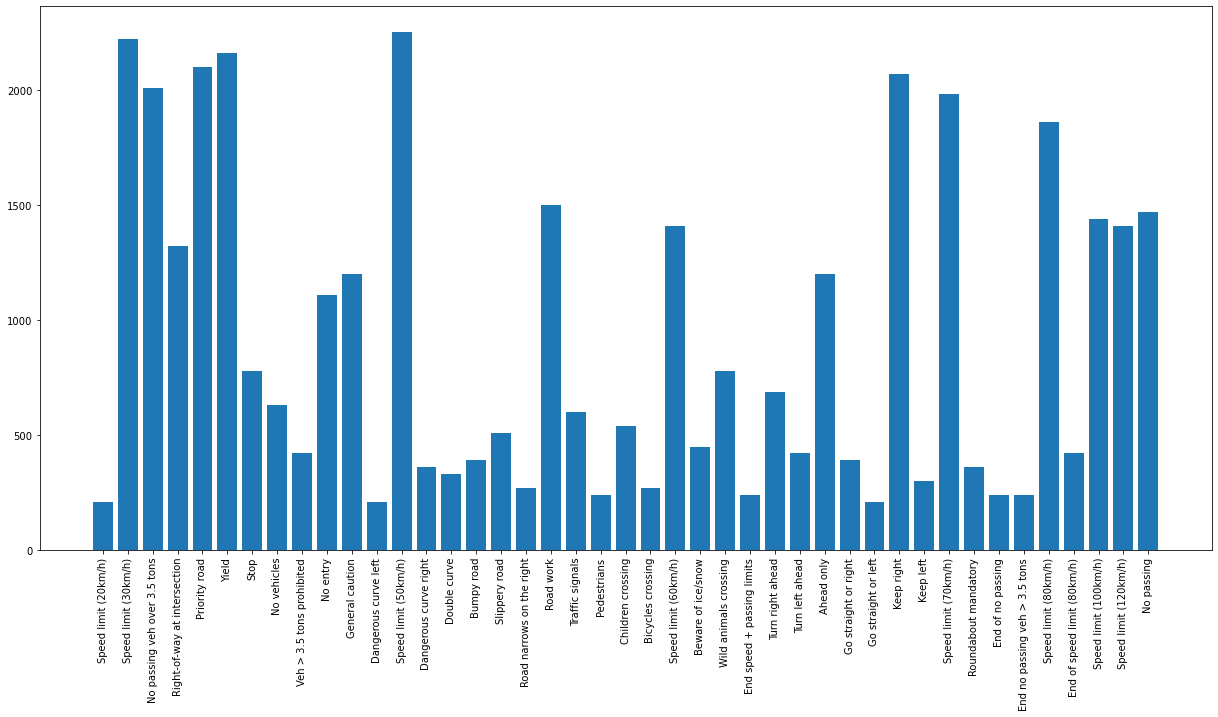

In [41]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


## showing random sample images

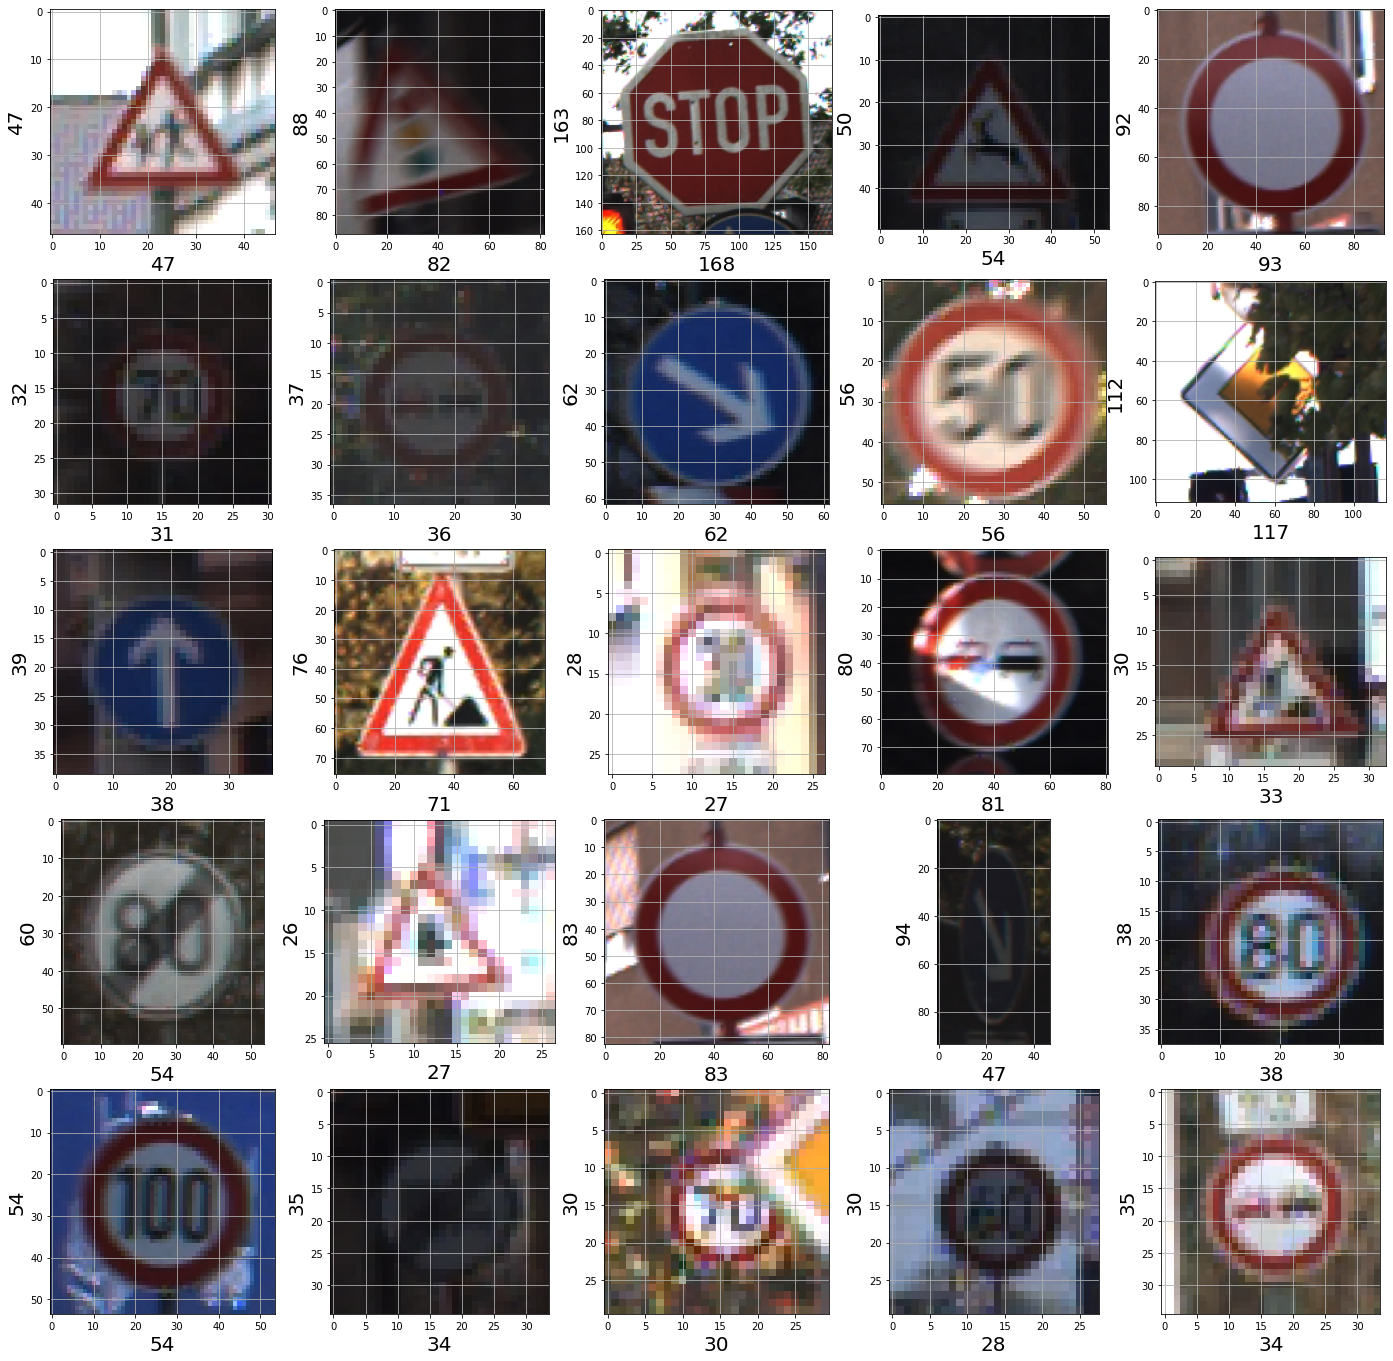

In [43]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
plt.figure(figsize=(24,24))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [44]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


## suffling images randomly

In [45]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [46]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

## Implementation using CNN Model 1

In [48]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 8)         608       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 8)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 16)       

In [53]:
learning_rate = 0.001
epochs = 30
opt = Adam(lr=learning_rate , decay=learning_rate  / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Data Augmentation

In [54]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9803WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000225DDAE7A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

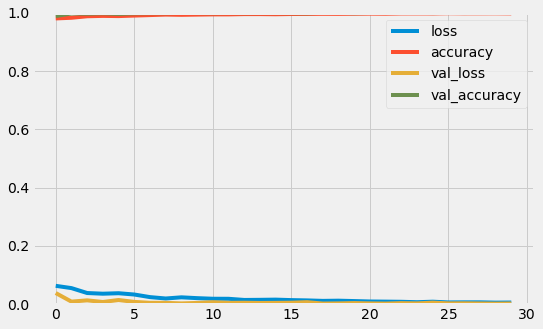

In [87]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## testing model on test data

In [58]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

C:\Users\yaswa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test Data accuracy:  98.701504354711


In [208]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
cf

array([[  0,  60,   0, ...,   0,   0,   0],
       [  0, 720,   0, ...,   0,   0,   0],
       [  0, 750,   0, ...,   0,   0,   0],
       ...,
       [  0,  90,   0, ...,   0,   0,   0],
       [  0,  60,   0, ...,   0,   0,   0],
       [  0,  90,   0, ...,   0,   0,   0]], dtype=int64)

<AxesSubplot:>

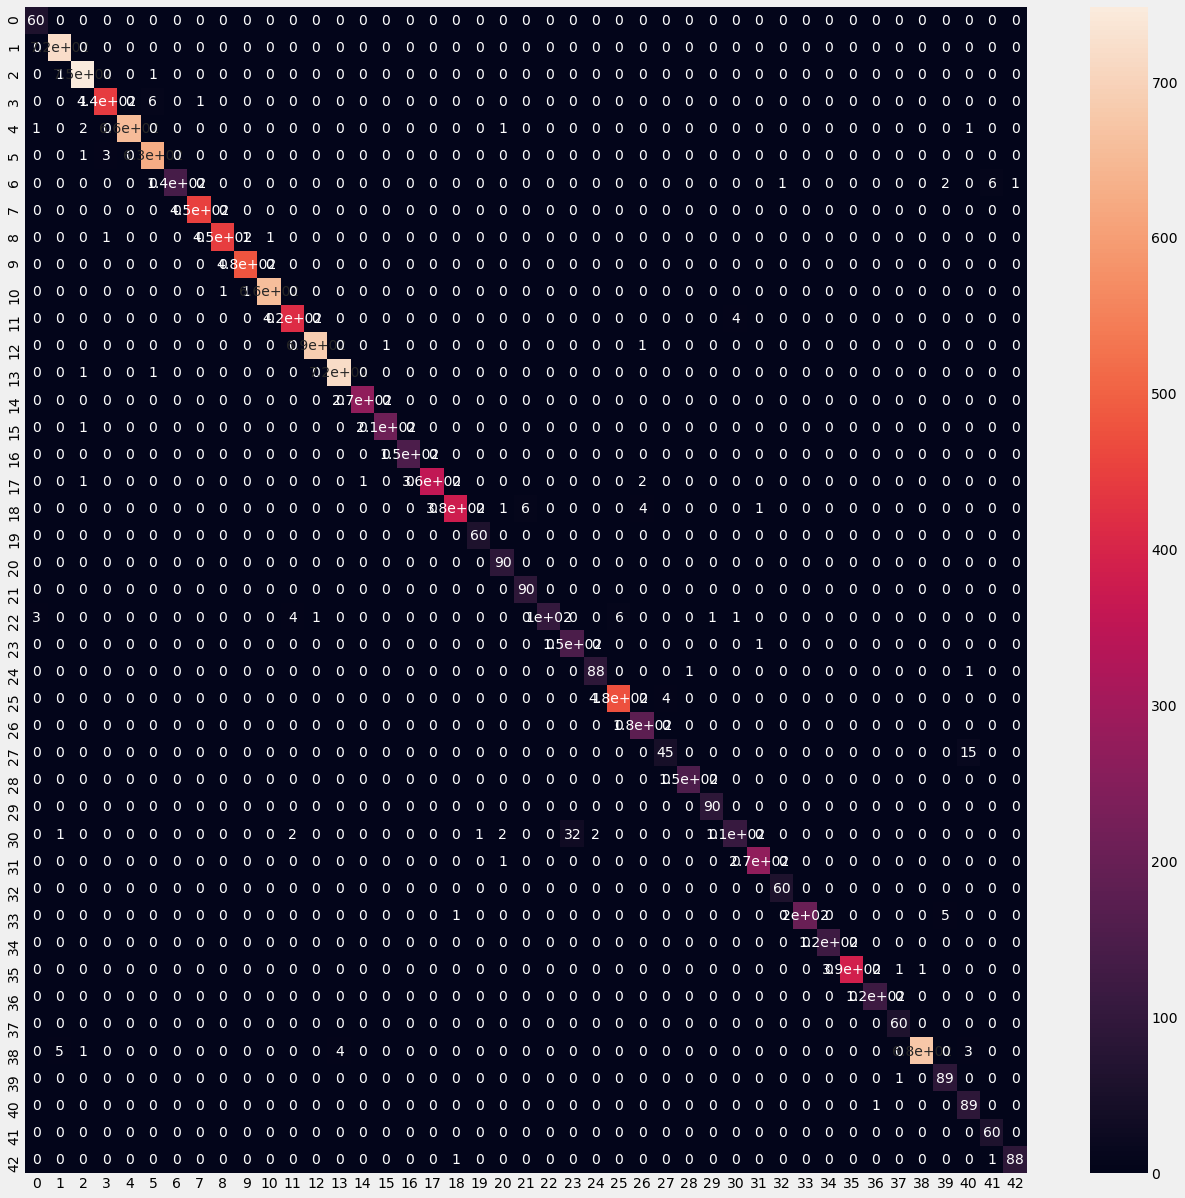

In [90]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Classification Report

In [61]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.99      1.00      1.00       720
           2       0.99      1.00      0.99       750
           3       0.99      0.98      0.99       450
           4       1.00      0.99      1.00       660
           5       0.99      0.99      0.99       630
           6       1.00      0.93      0.97       150
           7       1.00      1.00      1.00       450
           8       1.00      0.99      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.99      0.99       420
          12       1.00      1.00      1.00       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

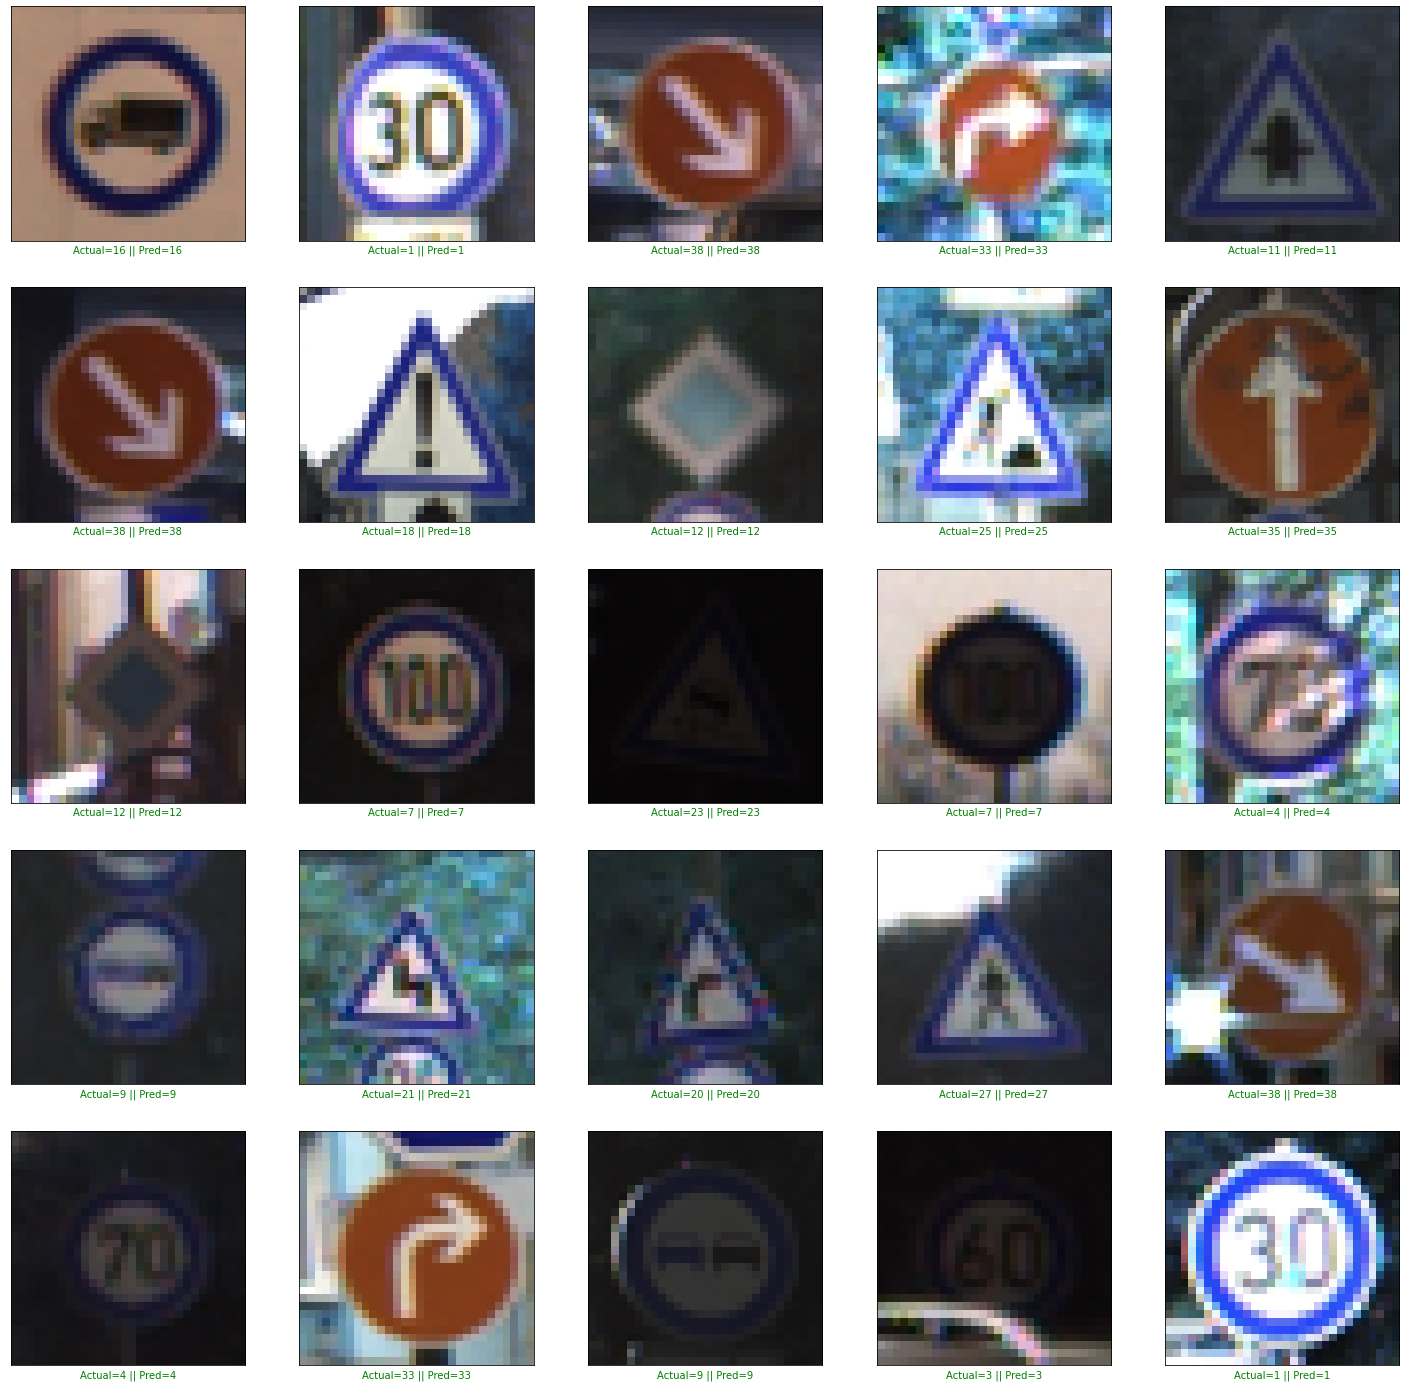

In [62]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [64]:
model.save("model.h5")

## predicting for outside dataset images

In [81]:
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("OIP (1).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14
Stop


In [82]:
image = cv2.imread("OIP (2).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

17
No entry


In [83]:
image = cv2.imread("OIP (5).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

35
Ahead only


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

## BULDING CNN MODEL 2 WITH Different Architectutre

In [237]:
model2 = Sequential()
chDimension = -1
# 1 set of layers (CONV , RELU , BNormalization and POOL layers)
model2.add(Conv2D(8, (5, 5), padding="same",input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chDimension))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# first 2 sets of layers 1st set (CONV , RELU ,) and another one of( CONV and RELU) then POOL layer
model2.add(Conv2D(16, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chDimension))
model2.add(Conv2D(16, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chDimension))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# second 2 second two sets of (CONV , RELU ,CONV  RELU) layers and POOL layer
model2.add(Conv2D(32, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chDimension))
model2.add(Conv2D(32, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chDimension))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# first set of fully connected layers , RELU layers
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.7))
# second set of fully connected layers ,RELU layers
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.7))
# softmax classifier ,The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.
# That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
model2.add(Dense(NUM_CATEGORIES))
model2.add(Activation("softmax"))
# compiling the model
model2.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

In [238]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 30, 30, 8)         608       
_________________________________________________________________
activation_24 (Activation)   (None, 30, 30, 8)         0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 15, 16)        1168      
_________________________________________________________________
activation_25 (Activation)   (None, 15, 15, 16)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 15, 15, 16)      

## Data Augmentation-2 changing values (differ from data augmentation - 1)

In [ ]:
aug1 = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.22,
    width_shift_range=0.13,
    height_shift_range=0.13,
    shear_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history1 = model2.fit(aug1.flow(X_train, y_train, batch_size=32), epochs=14, validation_data=(X_val, y_val))

Epoch 1/14
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
857/858 [============================>.] - ETA: 0s - loss: 3.8289 - accuracy: 0.1010WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002261869E1F0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 86s 89ms/step - loss: 3.8281 - accuracy: 0.1010 - val_loss: 2.5242 - val_accuracy: 0.2900
Epoch 2/14
858/858 [==============================] - 37s 43ms/step - loss: 2.5955 - accuracy: 0.2423 - val_loss: 1.8589 - val_accuracy: 0.4087
Epoch 3/14
858/858 [==============================] - 39s 46ms/step - loss: 2.0538 - accuracy: 0.3485 - val_loss: 1.5068 - val_accuracy: 0.4821
Epoch 4/14
858/858 [==============================] - 38s 44ms/step - loss: 1.7757 - accuracy: 0.4149 - val_loss: 1.2176 - val_accuracy: 0.5645
Epoch 5/14
858/858 [==============================] - 48s 56ms/step - loss: 1.5424 - accurac

## Result Graph

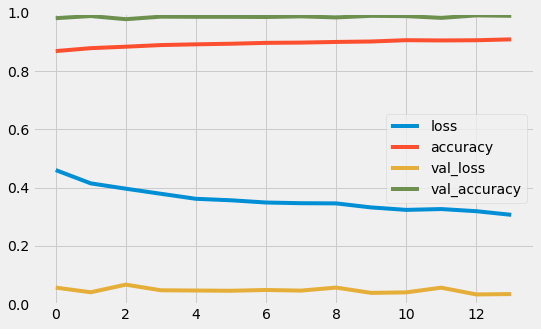

In [118]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [235]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model2.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test Data accuracy:  85.3206650831354


<AxesSubplot:>

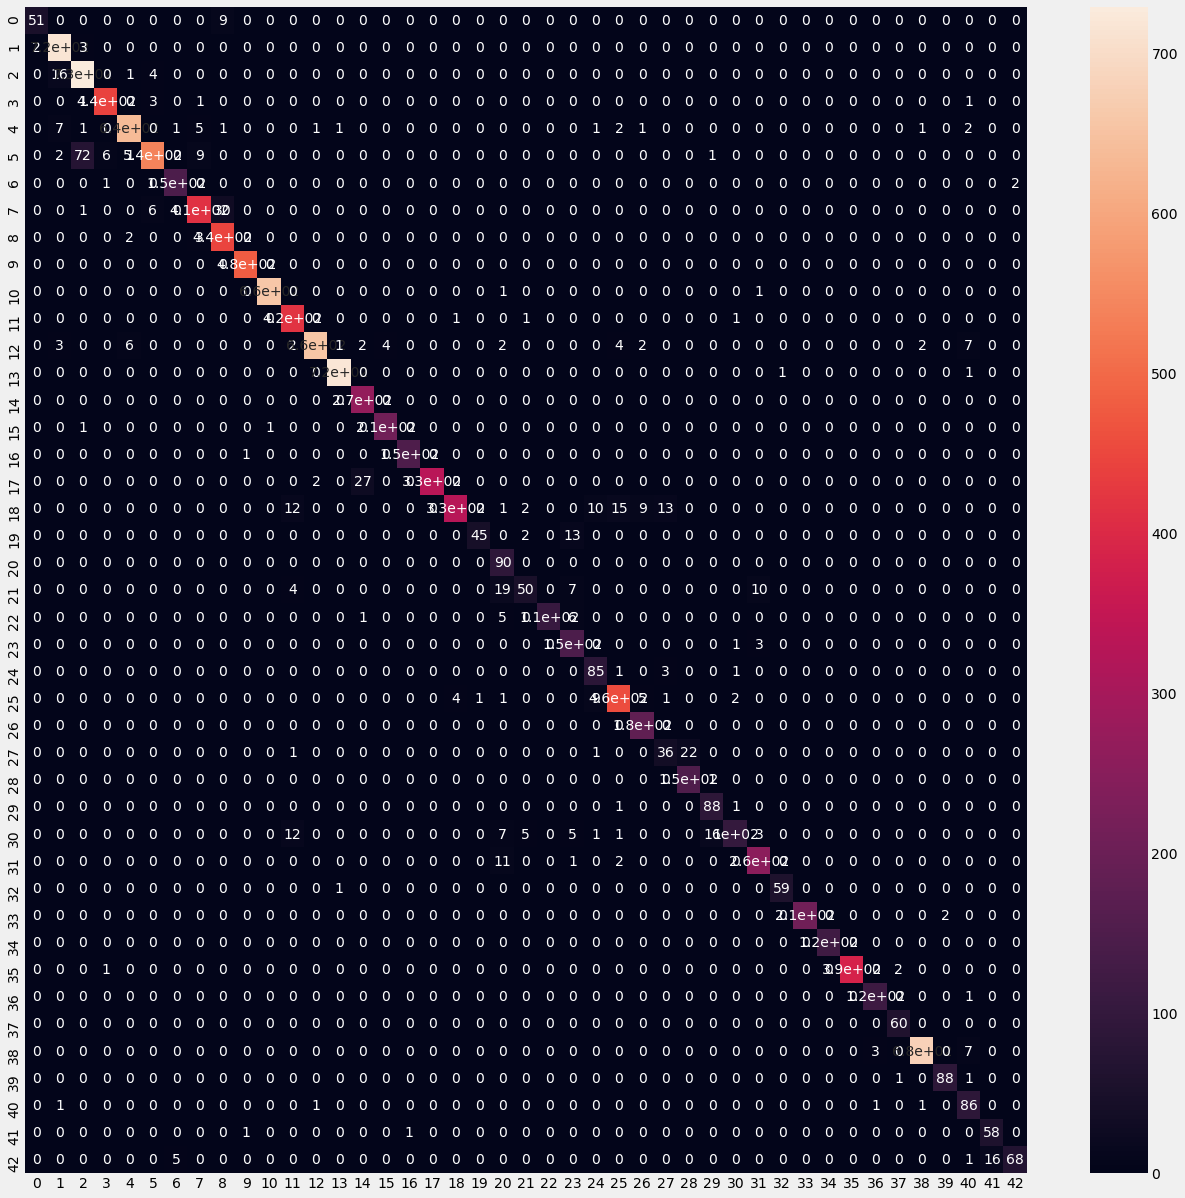

In [120]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## overall classification report

In [121]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.95      1.00      0.97       720
           2       0.93      0.97      0.95       750
           3       0.98      0.95      0.97       450
           4       0.97      0.95      0.96       660
           5       0.96      0.88      0.92       630
           6       0.95      0.98      0.97       150
           7       0.94      0.93      0.93       450
           8       0.93      1.00      0.96       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.93      0.90      0.91       420
          12       0.97      0.96      0.97       690
          13       0.99      1.00      1.00       720
          14       0.91      1.00      0.95       270
          15       1.00      0.97      0.98       210
          16       0.97      1.00      0.99       150
          17       1.00    

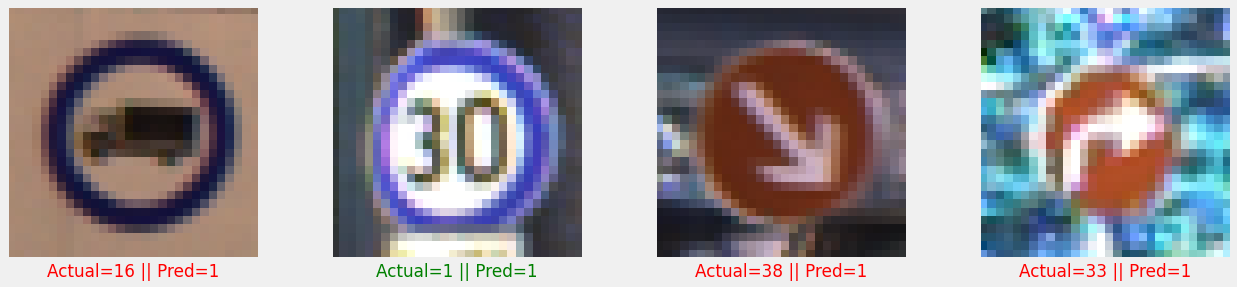

In [229]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(4):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
print(cf)

[[ 57   3   0 ...   0   0   0]
 [  0 717   2 ...   0   0   0]
 [  0  12 729 ...   0   0   0]
 ...
 [  0   0   0 ...  85   0   0]
 [  0   0   0 ...   3  55   0]
 [  0   0   0 ...   1  10  73]]


In [124]:
model2.save("model2.h5")

In [125]:
model_path = "model2.h5"
loaded_model = tf.keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("OIP (1).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14
Stop


In [126]:
image = cv2.imread("OIP (5).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

35
Ahead only


## model 2 and changing data agumentation values

In [ ]:
plot_augmentation(datagen, data)

In [144]:
aug2 = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.26,
    width_shift_range=0.12,
    height_shift_range=0.2,
    shear_range=0.23,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

history2 = model2.fit(aug2.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
858/858 [==============================] - 46s 53ms/step - loss: 0.7547 - accuracy: 0.7633 - val_loss: 0.2510 - val_accuracy: 0.9086
Epoch 2/15
858/858 [==============================] - 39s 46ms/step - loss: 0.7445 - accuracy: 0.7655 - val_loss: 0.2321 - val_accuracy: 0.9164
Epoch 3/15
858/858 [==============================] - 43s 50ms/step - loss: 0.7436 - accuracy: 0.7677 - val_loss: 0.2441 - val_accuracy: 0.9144
Epoch 4/15
858/858 [==============================] - 40s 46ms/step - loss: 0.7345 - accuracy: 0.7669 - val_loss: 0.2422 - val_accuracy: 0.9124
Epoch 5/15
858/858 [==============================] - 42s 49ms/step - loss: 0.7214 - accuracy: 0.7741 - val_loss: 0.2469 - val_accuracy: 0.9116
Epoch 6/15
858/858 [==============================] - 40s 46ms/step - loss: 0.7301 - accuracy: 0.7726 - val_loss: 0.2363 - val_accuracy: 0.9168
Epoch 7/15
858/858 [==============================] - 41s 47ms/step - loss: 0.7176 - accuracy: 0.7776 - val_loss: 0.2335 - val_accuracy:

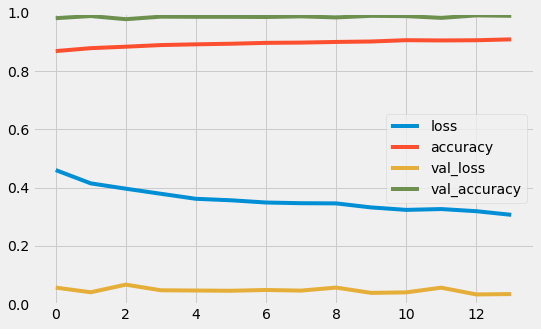

In [154]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<AxesSubplot:>

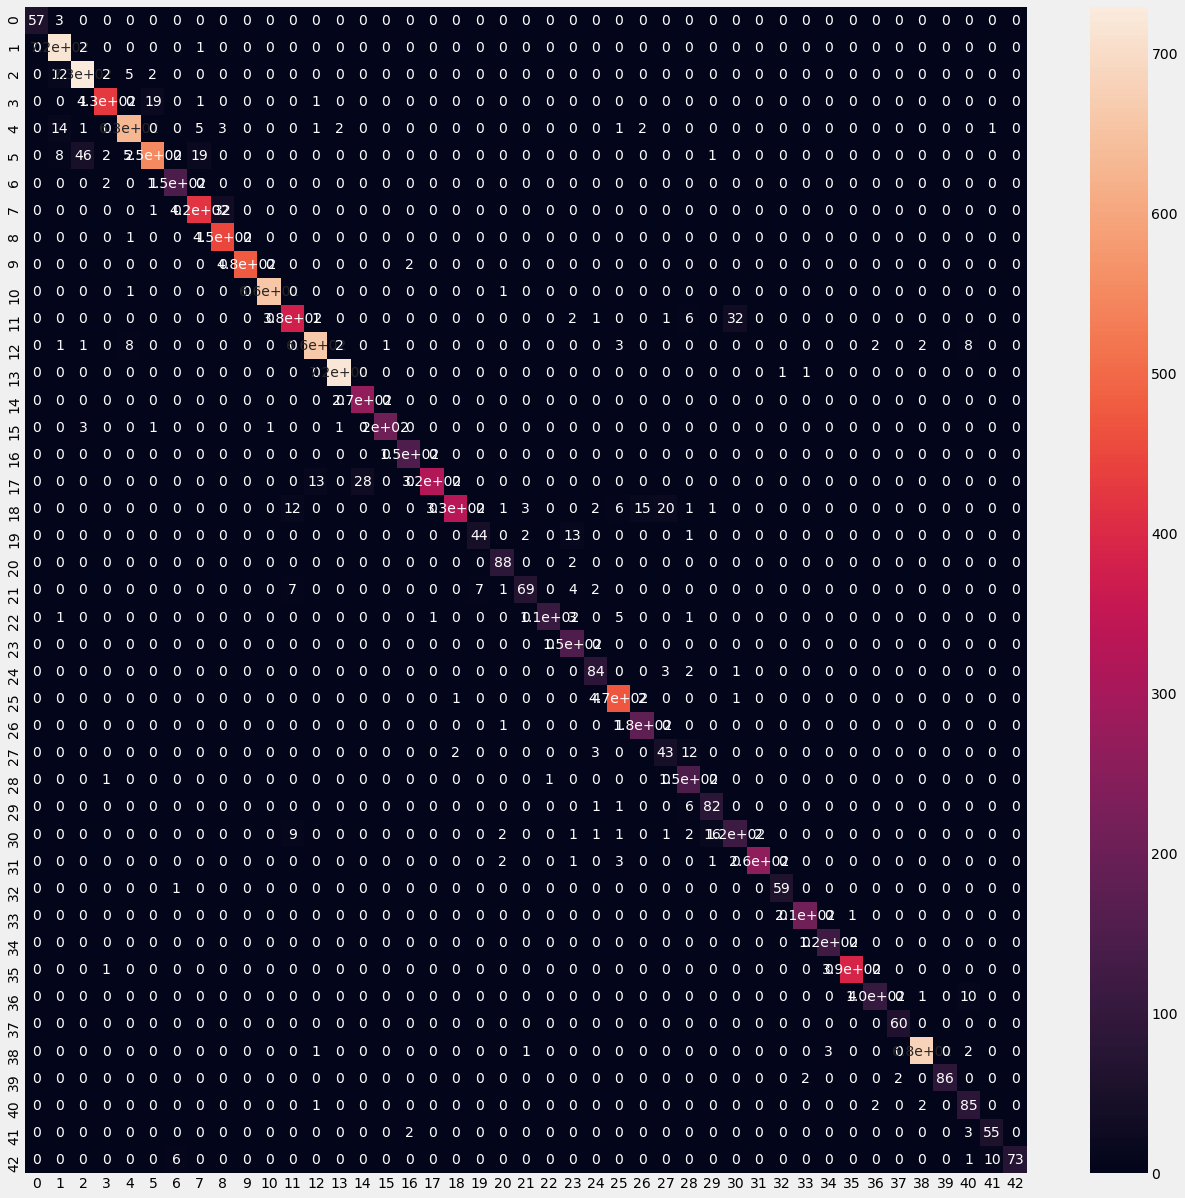

In [139]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [159]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.90      0.98      0.94       720
           2       0.89      0.89      0.89       750
           3       0.94      0.79      0.86       450
           4       0.93      0.91      0.92       660
           5       0.75      0.87      0.81       630
           6       0.84      0.99      0.91       150
           7       0.90      0.94      0.92       450
           8       0.96      0.89      0.93       450
           9       0.98      0.99      0.98       480
          10       0.99      1.00      0.99       660
          11       0.99      0.88      0.93       420
          12       0.98      0.98      0.98       690
          13       0.95      0.97      0.96       720
          14       0.98      0.99      0.99       270
          15       1.00      0.97      0.98       210
          16       0.98      1.00      0.99       150
          17       0.99    

C:\Users\yaswa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## testing on test data for data augumentation-3 and finding accuracy

In [156]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model2.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

C:\Users\yaswa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '


Test Data accuracy:  88.19477434679335


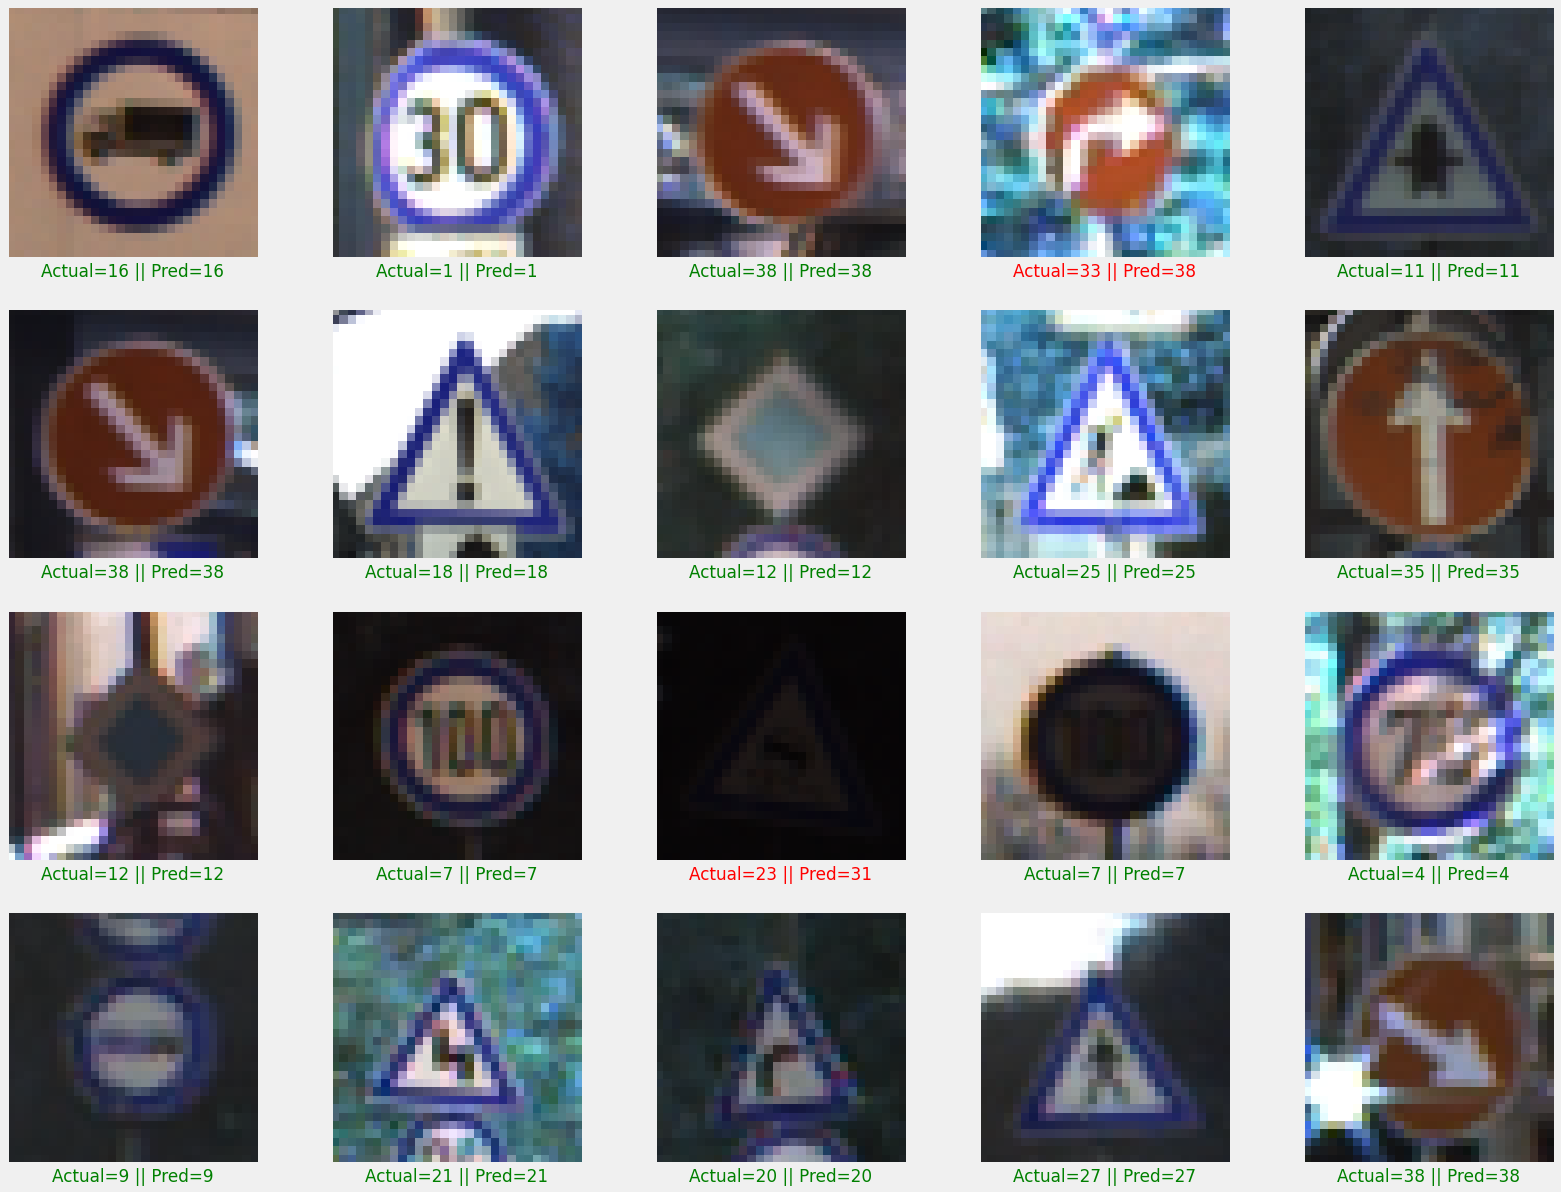

In [158]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

## Testing on random images

In [148]:
image = cv2.imread("OIP (5).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

35
Ahead only


In [160]:
image = cv2.imread("OIP (1).jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)
print(classes[result])

14
Stop


## VGG16 model with less parameters(Partial Architecture)

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [178]:
model3 = Sequential()
model3.add(Conv2D(input_shape=(IMG_HEIGHT,IMG_WIDTH,channels),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Flatten())
model3.add(Dense(units=1024,activation="relu"))
model3.add(Dense(units=43, activation="softmax"))
model3.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

In [179]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 15, 15, 256)       295168    
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 15, 15, 512)     

<AxesSubplot:>

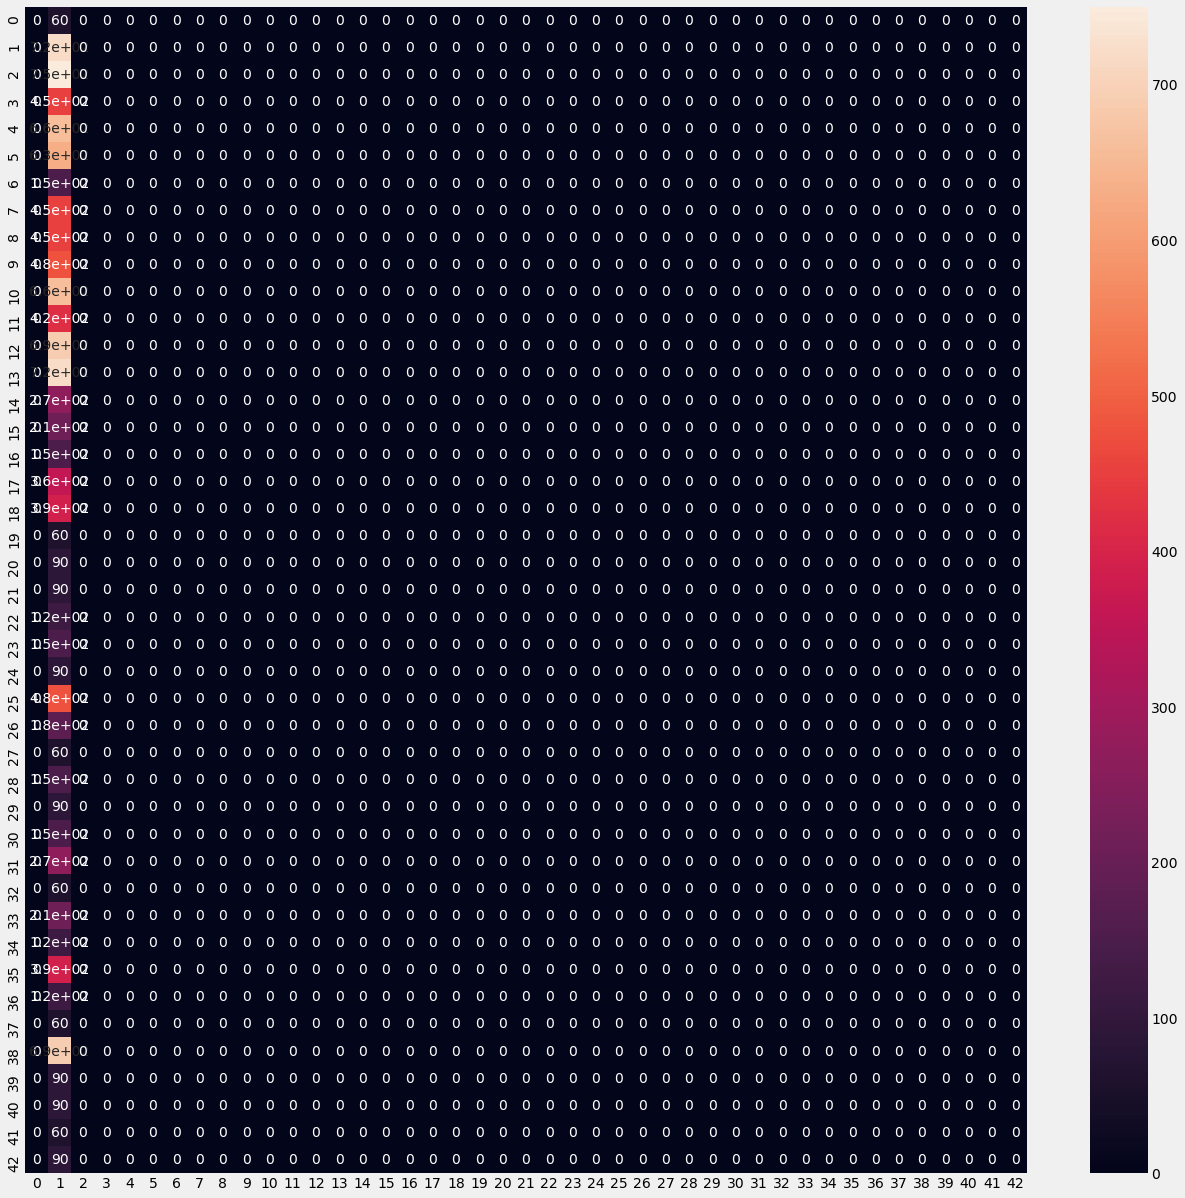

In [227]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [180]:
aug4 = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history3 = model3.fit(aug4.flow(X_train, y_train, batch_size=32), epochs=13, validation_data=(X_val, y_val))

Epoch 1/13
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - ETA: 0s - loss: 3.5224 - accuracy: 0.0546WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000225F642CD30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

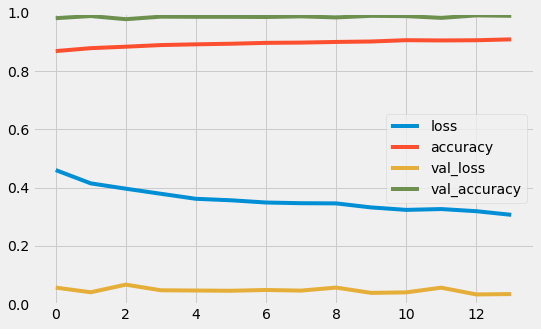

In [181]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [226]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

C:\Users\yaswa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.06      1.00      0.11       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.00      0.00      0.00       720
          14       0.00      0.00      0.00       270
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00       150
          17       0.00    

In [186]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model3.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  5.7007125890736345


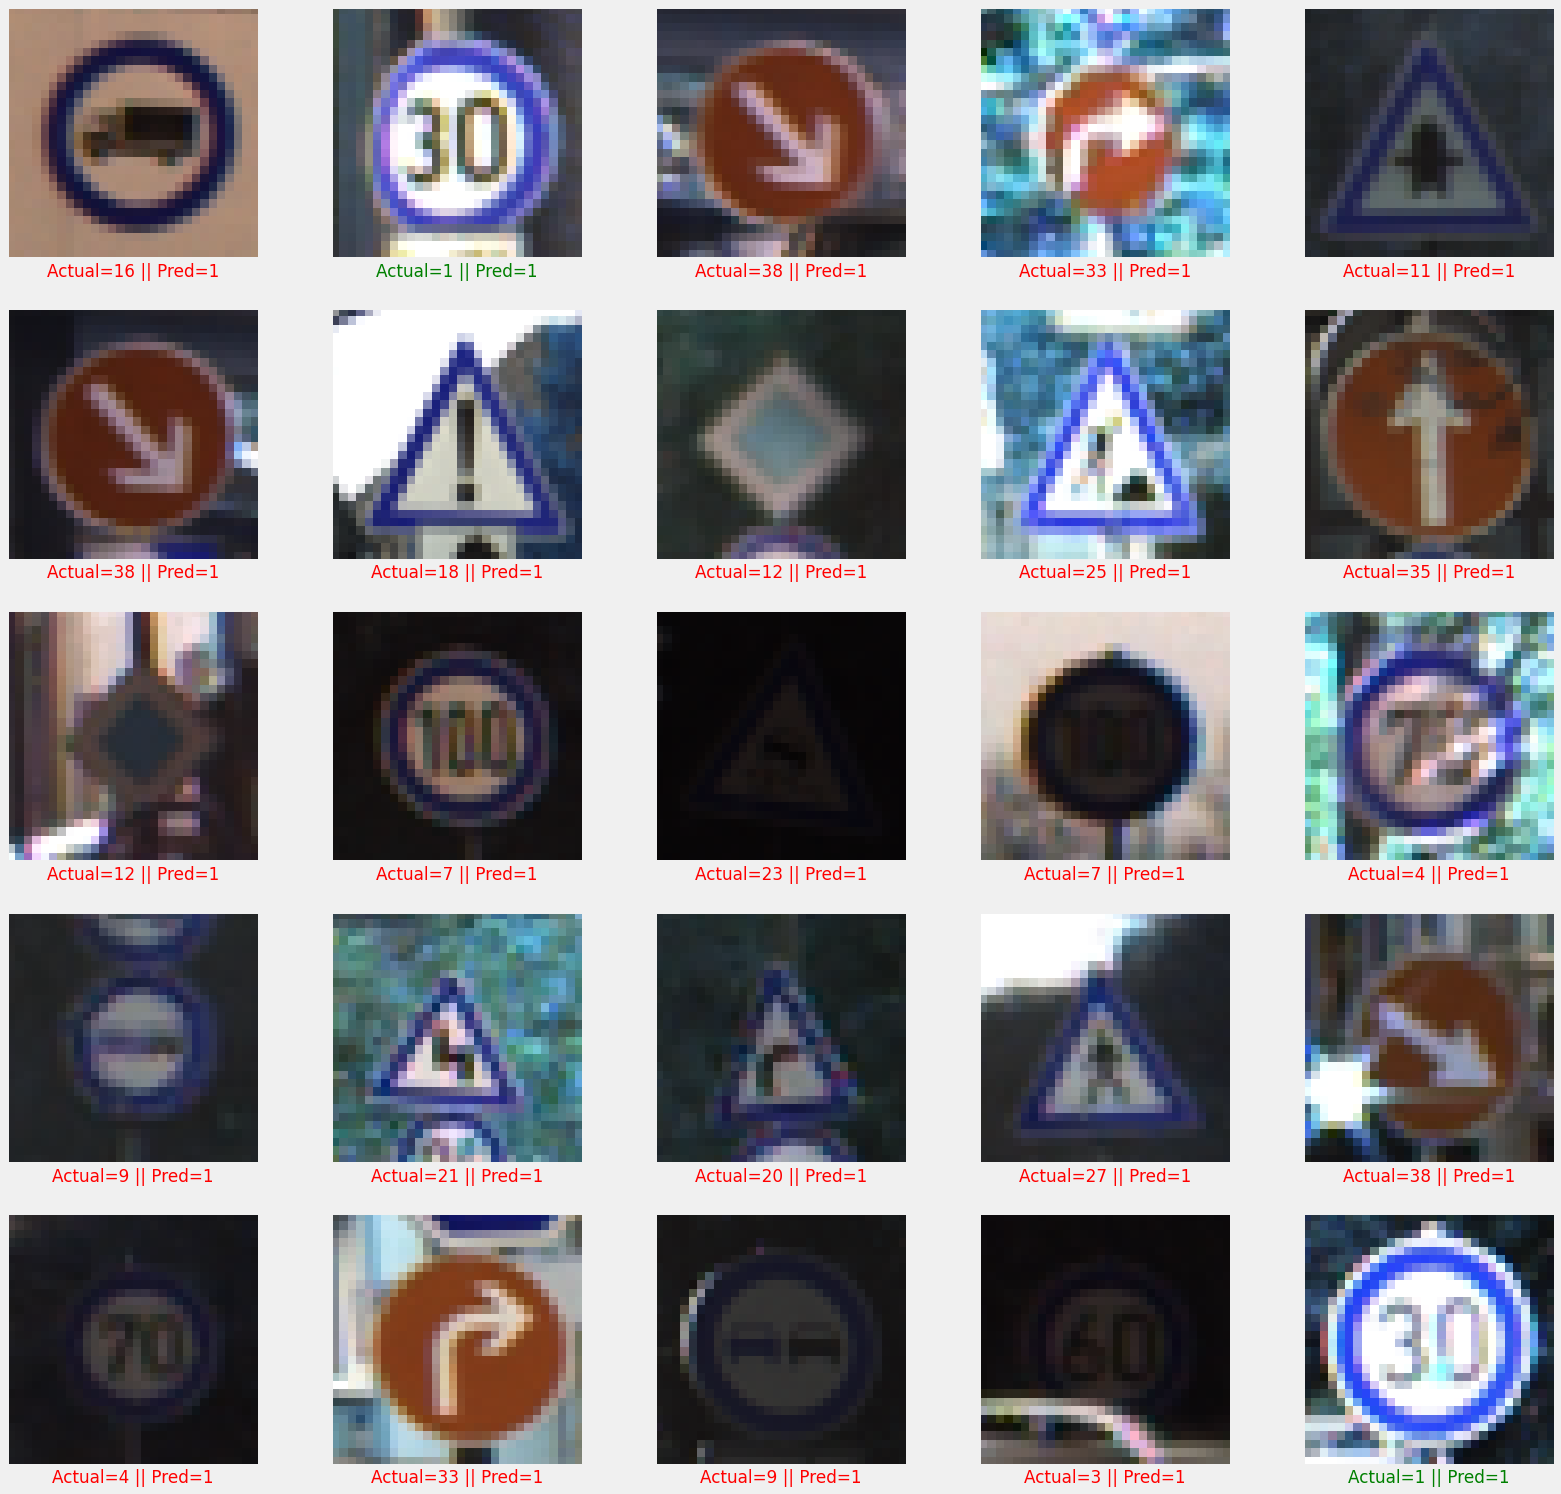

In [189]:
#As it contains only 5.70 % accuracy for this model it predicts very few data as correect data

plt.figure(figsize = (25, 25))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

## Plotting Bar graph on test accuracy for different models

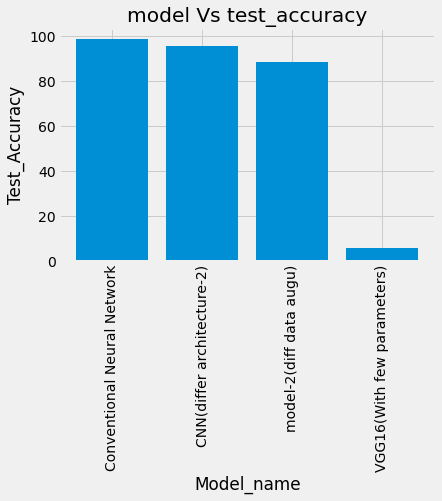

<Figure size 1800x1080 with 0 Axes>

In [225]:
import matplotlib.pyplot as plt
model_name = ['Conventional Neural Network','CNN(differ architecture-2)','model-2(diff data augu)','VGG16(With few parameters)']
test_accuracy = [98.70,95.47,88.19,5.70]
plt.bar(model_name,test_accuracy)
plt.xticks(rotation=90)
plt.title('model Vs test_accuracy')
plt.xlabel('Model_name')
plt.ylabel('Test_Accuracy')
plt.figure(figsize = (25,15))
plt.show()